In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector
import numpy as nmp

db=mysql.connector.connect(host="127.0.0.1",user="root",passwd="Mysql@12kk",database="ecommerce")
cur=db.cursor()

#  List all unique cities where customers are located.

In [81]:
query=""" select distinct customer_city from customers"""
cur.execute(query)
data=cur.fetchall()
df=pd.DataFrame(data)
df.head()

,0
0,franca
1,sao bernardo do campo
2,sao paulo
3,mogi das cruzes
4,campinas


#  Count the number of orders placed in 2017.

In [14]:
query=""" select count(order_id) from orders where year(order_purchase_timestamp)=2017"""
cur.execute(query)
data=cur.fetchall()
"Total orders placed in 2017 are" ,data[0][0]


('Total orders placed in 2017 are', 90202)

# find the total sales per category.

In [39]:
query=""" select products.product_category category,
            round(sum(payments.payment_value),2)sales
            from products join order_items on
            products.product_id=order_items.product_id
            join payments on 
            payments.order_id=order_items.order_id
            group by category"""
cur.execute(query)
data=cur.fetchall()
df=pd.DataFrame(data,columns=["Category","Sales"])
df

,Category,Sales
0,perfumery,4053909.28
1,Furniture Decoration,11441411.13
2,telephony,3895056.41
3,Fashion Bags and Accessories,1745266.24
4,bed table bath,13700429.37
...,...,...
69,cds music dvds,9595.44
70,La Cuisine,23308.24
71,Fashion Children's Clothing,6285.36
72,PC Gamer,17395.44


# Calculate the percentage of orders that were paid in installments.

In [50]:
query=""" select (sum(case when payment_installments>=1 then 1 else
0 end))/count(*)*100 from payments"""
cur.execute(query)
data=cur.fetchall()
"the percentage of orders that were paid in installments" ,data

('the percentage of orders that were paid in installments',
 [(Decimal('99.9981'),)])

# Count the number of customers from each state

In [9]:
query="""select count(customer_state),customer_state from customers group by customer_state"""
cur.execute(query)
data=cur.fetchall()
df=pd.DataFrame(data,columns=["Customer_count","State"])
df

,Customer_count,State
0,83492,SP
1,7274,SC
2,23270,MG
3,10090,PR
4,25704,RJ
5,10932,RS
6,1950,PA
7,4040,GO
8,4066,ES
9,6760,BA


<Figure size 800x500 with 0 Axes>

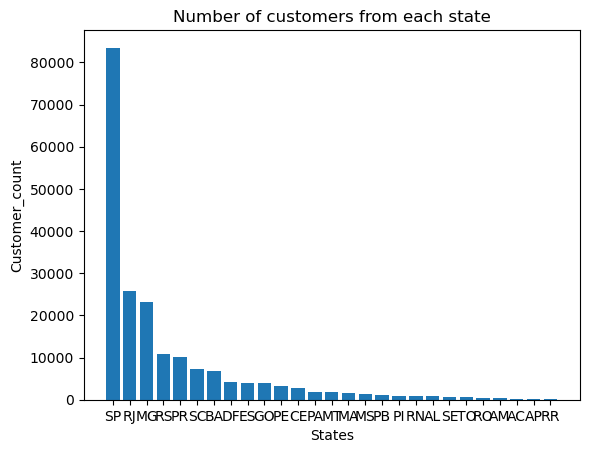

<Figure size 800x500 with 0 Axes>

In [45]:
df=df.sort_values(by="Customer_count",ascending=False)
plt.bar(df["State"],df["Customer_count"])
plt.xlabel("States")
plt.ylabel("Customer_count")
plt.title("Number of customers from each state")
plt.figure(figsize=(8,5))
# plt.set_xticklabels(States, rotation=45)

# Calculate the number of orders per month in 2018

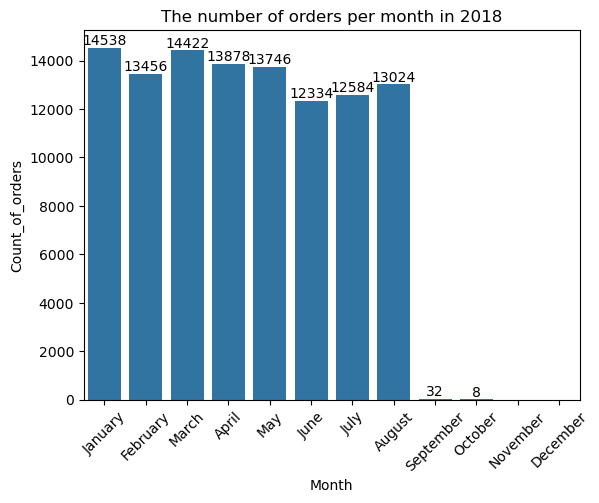

In [122]:
query=""" select monthname(order_purchase_timestamp) Month,count(order_id) from orders where year(order_purchase_timestamp)=2018 group by Month """
cur.execute(query)
data=cur.fetchall()
df=pd.DataFrame(data,columns=["Month","Count_of_orders"])
df
o= [
    "January", "February", "March", "April", "May", "June",
    "July", "August", "September", "October", "November", "December"
]
ax=sns.barplot(x=df["Month"],y=df["Count_of_orders"],data=df,order=o)
ax.bar_label(ax.containers[0])
plt.xticks(rotation=45)
plt.title("The number of orders per month in 2018")
plt.show()

# Find the average number of products per order, grouped by customer city.

In [120]:
query=""" with count_per_order as 
(select orders.order_id,orders.customer_id, count(order_items.order_id) as OC from orders
join order_items on 
orders.order_id=order_items.order_id
group by orders.order_id, orders.customer_id)

select customers.customer_city as City,round(avg(count_per_order.OC),2) as Average_Order
from  customers join count_per_order
on customers.customer_id=count_per_order.customer_id
group by City """
cur.execute(query)
data=cur.fetchall()
df=pd.DataFrame(data,columns=["Customer_City","Average_Orders"])
df.head(10)


,Customer_City,Average_Orders
0,sao jose dos campos,4.55
1,indaial,4.46
2,treze tilias,5.09
3,sao paulo,4.62
4,rio de janeiro,4.59
5,mario campos,5.33
6,guariba,4.00
7,cuiaba,4.79
8,franca,5.01
9,tocos,4.00


# Calculate the percentage of total revenue contributed by each product category

In [129]:
query=""" select products.product_category category,
            round(sum(payments.payment_value)/(select sum(payment_value) from payments)*100,2)sales
            from products join order_items on
            products.product_id=order_items.product_id
            join payments on 
            payments.order_id=order_items.order_id
            group by category"""
cur.execute(query)
data=cur.fetchall()
df=pd.DataFrame(data,columns=["Category","Percentage Sales"])
df.head(10)

,Category,Percentage Sales
0,perfumery,12.66
1,Furniture Decoration,35.73
2,telephony,12.17
3,Fashion Bags and Accessories,5.45
4,bed table bath,42.79
5,automotive,21.30
6,computer accessories,39.61
7,housewares,27.35
8,babies,13.49
9,toys,15.47


# Identify the correlation between product price and the number of times a product has been purchased

In [140]:
query=""" select  products.product_category Category,
count(order_items.product_id),round(avg(order_items.price),2) Price	
from products  join order_items
on products.product_id=order_items.product_id
group by Category;"""
cur.execute(query)
data=cur.fetchall()
df=pd.DataFrame(data,columns=["Category","Count","Price"])
ar1=df["Count"]
ar2=df["Price"]
a=nmp.corrcoef([ar1,ar2])
print("The correlation between product price and the number of times a product has been purchased",a[0][1])

The correlation between product price and the number of times a product has been purchased -0.1063151416715757


# Calculate the total revenue generated by each seller, and rank them by revenue.

In [26]:
query="""  select * ,dense_rank() over(order by revenue desc) as 'Rank' from 
(select order_items.seller_id,sum(payments.payment_value) revenue 
from order_items
join payments on order_items.order_id=payments.order_id
group by order_items.seller_id) as a
"""
cur.execute(query)
data=cur.fetchall()
df=pd.DataFrame(data,columns=["Seller_id","Revenue","Rank"])
df 
df.head(10)

,Seller_id,Revenue,Rank
0,7c67e1448b00f6e969d365cea6b010ab,2.028668e+06,1
1,1025f0e2d44d7041d6cf58b6550e0bfa,1.232888e+06,2
2,4a3ca9315b744ce9f8e9374361493884,1.204981e+06,3
3,1f50f920176fa81dab994f9023523100,1.161014e+06,4
4,53243585a1d6dc2643021fd1853d8905,1.139612e+06,5
5,da8622b14eb17ae2831f4ac5b9dab84a,1.088877e+06,6
6,4869f7a5dfa277a7dca6462dcf3b52b2,1.056664e+06,7
7,955fee9216a65b617aa5c0531780ce60,9.452892e+05,8
8,fa1c13f2614d7b5c4749cbc52fecda94,8.260529e+05,9
9,7e93a43ef30c4f03f38b393420bc753a,7.405368e+05,10
